Kd = 0.12184595485546261 +/- 0.9944584555223484
[0.12184595 0.06458745 0.06176167 3.21127899]


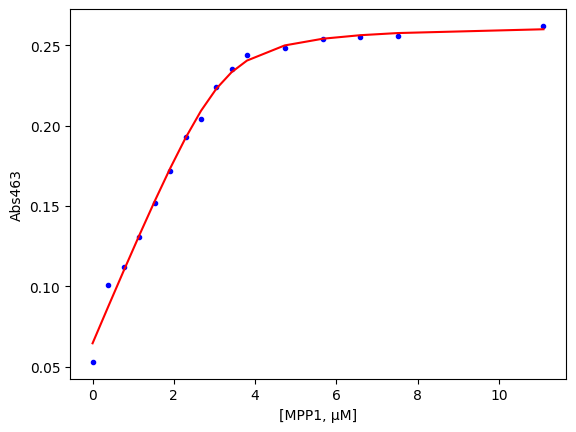

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(Pt, Kd, c, Eps, Lt): 
    return (1/2*(Kd + Lt + Pt - np.sqrt((Kd + Lt + Pt)**2 - 4*Lt*Pt)))*Eps + c
Pt = [0, 0.384, 0.768, 1.15, 1.53, 1.91, 2.29, 2.67, 3.05, 3.42, 3.80, 4.73, 5.67, 6.59, 7.51, 11.1]
ydata = [0.053, 0.101, 0.112, 0.131, 0.152, 0.172, 0.193, 0.204, 0.224, 0.235, 0.244, 0.248, 0.254, 0.2548, 0.256, 0.262] 
#e = np.repeat(0.0001, 16)
#plt.errorbar(Pt, ydata, yerr=e, fmt="none")
popt, pcov = curve_fit(func, Pt, ydata, p0=[0.1, 0.05, 0.055, 3.8], bounds=(0, [1, 0.1, 0.1, 5])) #sigma=e)     
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)
print(popt)
#perr = np.sqrt(np.diag(pcov))
plt.plot(Pt, ydata, 'b.', label='data')
ymodel=[]
for val in Pt:
    ymodel.append(func(val, *popt))

plt.plot(Pt, ymodel, 'r-')
plt.xlabel('[MPP1, µM]')
plt.ylabel('Abs463')
plt.show()

#output [0.12184595 0.06458745 0.06176167 3.21127899]
